In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# %matplotlib notebook
%matplotlib inline

df_myosin = pd.read_csv('myosin.csv',delimiter='\t')
df_area = pd.read_csv('cellarea.csv',delimiter='\t')
df_reg = pd.read_csv('reg.csv',delimiter='\t')


In [2]:
time = df_area['time']

In [3]:
df_myosin.head()

,time,cell0,cell7,cell12,cell17,cell22,cell27,cell32,cell37,cell42,...,cell245,cell248,cell251,cell254,cell257,cell261,cell264,cell268,cell271,cell275
0,0.0,5857.012775,5857.012775,5857.012775,5857.012775,5857.012775,5857.012775,5857.012775,5857.012775,5857.012775,...,5857.012775,5857.012775,5857.012775,5857.012775,5857.012775,5857.012775,5857.012775,5857.012775,5857.012775,5857.012775
1,0.1,5717.388859,5717.388859,5717.388859,5717.388859,5717.388859,5717.388859,5717.388859,5717.388859,5717.388859,...,5717.388859,5717.388859,5717.388859,5717.388859,5717.388859,5717.388859,5717.388859,5717.388859,5717.388859,5717.388859
2,0.2,5581.051215,5581.051215,5581.051215,5581.051215,5581.051215,5581.051215,5581.051215,5581.051215,5581.051215,...,5581.051215,5581.051215,5581.051215,5581.051215,5581.051215,5581.051215,5581.051215,5581.051215,5581.051215,5581.051215
3,0.3,5447.924470,5447.924470,5447.924470,5447.924470,5447.924470,5447.924470,5447.924470,5447.924470,5447.924470,...,5447.924470,5447.924470,5447.924470,5447.924470,5447.924470,5447.924470,5447.924470,5447.924470,5447.924470,5447.924470
4,0.4,5317.934890,5317.934890,5317.934890,5317.934890,5317.934890,5317.934890,5317.934890,5317.934890,5317.934890,...,5317.934890,5317.934890,5317.934890,5317.934890,5317.934890,5317.934890,5317.934890,5317.934890,5317.934890,5317.934890


In [4]:
df_myosin.tail()

,time,cell0,cell7,cell12,cell17,cell22,cell27,cell32,cell37,cell42,...,cell245,cell248,cell251,cell254,cell257,cell261,cell264,cell268,cell271,cell275
3195,319.5,507.302419,29644.924887,199.981264,13387.442262,2127.634073,53535.729041,42050.161961,49598.136540,68110.346061,...,9085.360240,13201.206303,2359.466627,67234.879104,67695.889431,56807.387132,32493.949161,1933.727116,66688.346893,143.958362
3196,319.6,518.099600,29455.459325,201.389304,13474.927571,2084.672910,53619.939879,42146.648278,49690.946348,68140.968494,...,9169.007983,13288.513379,2311.484647,67195.498849,67734.349571,56697.960502,32588.568063,1894.957461,66733.516016,144.473079
3197,319.7,529.306105,29265.503524,202.824153,13562.464536,2042.658773,53703.999942,42243.118182,49783.647469,68171.261538,...,9252.758002,13375.875324,2264.564677,67155.673614,67772.488378,56588.059310,32683.219311,1857.042269,66778.386843,144.994957
3198,319.8,540.939625,29075.058508,204.286523,13650.052779,2001.569518,53787.906019,42339.569901,49876.239676,68201.221258,...,9336.608678,13463.290752,2218.681459,67115.401296,67810.305255,56477.682883,32777.902900,1819.964437,66822.955678,145.524105
3199,319.9,553.018441,28884.125497,205.777135,13737.692242,1961.384084,53871.657339,42436.000105,49968.724193,68230.846342,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
tspan = [0,75]
center_node = 7
cell = 'cell' + str(center_node)


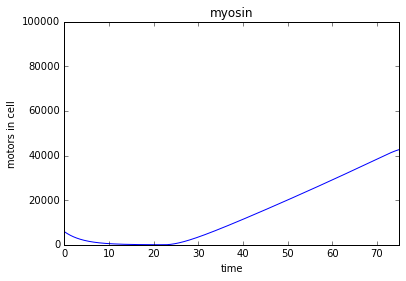

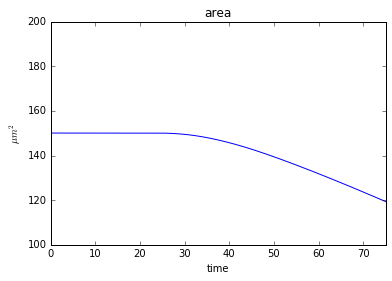

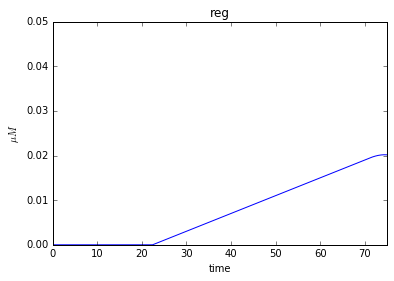

In [16]:
plt.figure(1)
plt.title('myosin')
plt.plot(df_myosin['time'],df_myosin[cell])
plt.xlim(tspan)
plt.ylim([0,100000])
plt.xlabel("time")
plt.ylabel("motors in cell")
plt.show()

plt.figure(2)
plt.title('area')
plt.plot(df_area['time'],df_area[cell])
plt.xlim(tspan)
plt.ylim([100,200])
plt.xlabel("time")
plt.ylabel("$\mu m^2$")
plt.show()

plt.figure(3)
plt.title('reg')
plt.plot(df_reg['time'],df_reg[cell])
plt.xlim(tspan)
plt.ylim([0,0.05])
plt.xlabel("time")
plt.ylabel("$\mu M$")
plt.show()

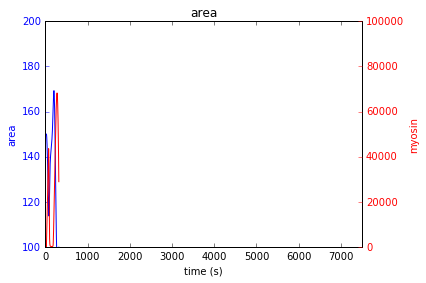

In [17]:
fig, ax1 = plt.subplots()
plt.title('area')
ax1.plot(df_area['time'],df_area[cell],'b-')
ax1.set_xlabel('time (s)')
ax1.set_xlim([0,7500])
ax1.set_ylim([100,200])
ax1.set_ylabel('area', color='b')
ax1.tick_params('y', colors='b')

ax2 = ax1.twinx()
ax2.plot(df_myosin['time'],df_myosin[cell],'r-')
ax2.set_xlim([0,7500])
ax2.set_ylim([0,100000])
ax2.set_ylabel('myosin', color='r')
ax2.tick_params('y', colors='r')
fig.tight_layout()
plt.show()

In [18]:
area = df_area[cell]
myosin = df_myosin[cell]

In [19]:
# Convert number of molecules to a concentration
# mols = Number of molecules
# cell_vol = volume in micro-meters^3
# N_A = 6.022*10^23 (Avogadro's Number)
# Returns concentration in Molar

def mol2conc(mols, cell_vol, N_A):
    conc = mols*10**(3)*10**(12)*(1/N_A)*(1/cell_vol)     
    return conc

# Convert a concentration to number of molecules
# IC = concentration (in Molar)
# cell_vol = volume in micro-meters^3
# N_A = 6.022*10^23 (Avogadro's Number)
# Returns number of molecules

def conc2mol(IC, cell_vol, N_A):
    Mol = IC*10**(-3)*10**(-12)*N_A*cell_vol
    return Mol

In [20]:
Na = 6.022*10**23

In [21]:
myo_conc = mol2conc(myosin,area*5,Na)

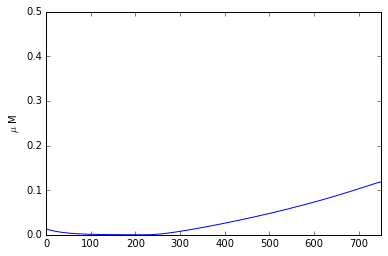

In [22]:
plt.plot(myo_conc*10**6)
plt.xlim([tspan[0],tspan[1]*10])
plt.ylim([0,0.5])
plt.ylabel('$\mu$ M')